In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler

fake_name = "fake_smote.xlsx"
#fake_name = "generated01.xlsx"
fake = pd.read_excel(fake_name)
original = pd.read_excel("../preprocesado.xlsx")

In [2]:
original.columns

Index(['eb_lc_sexo', 'eb_lc_etnia', 'edad', 'eb_lc_dpto_infeccion',
       'eb_lc_estatura', 'eb_lc_tiempo_evolucion', 'eb_lc_num_lc_activas',
       'eb_lc_ulcera_area_1', 'eb_lc_tto_mcto_glucan_dosis',
       'ef_lc_estado_final_estudio'],
      dtype='object')

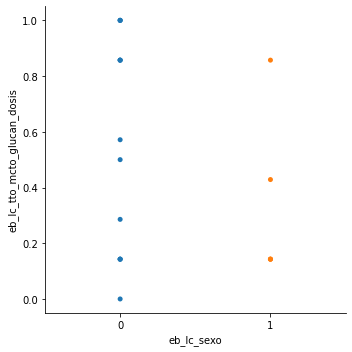

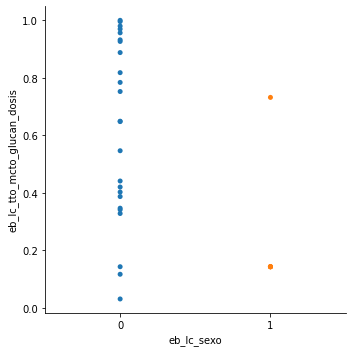

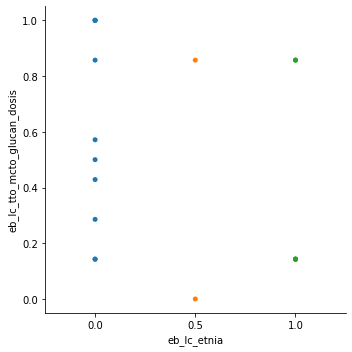

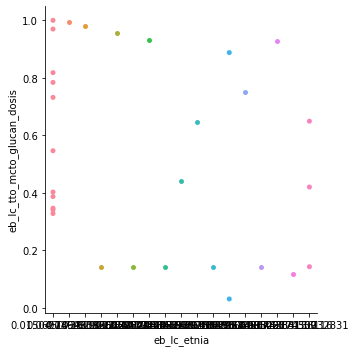

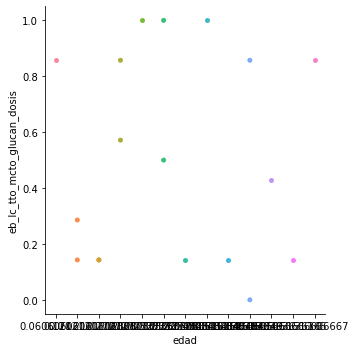

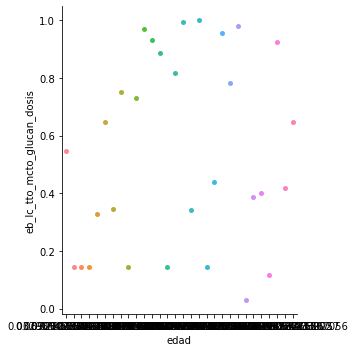

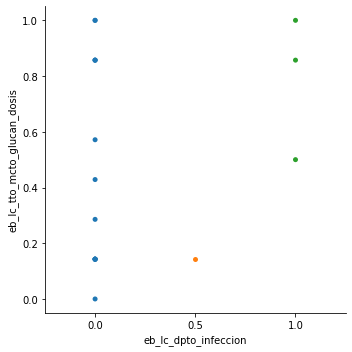

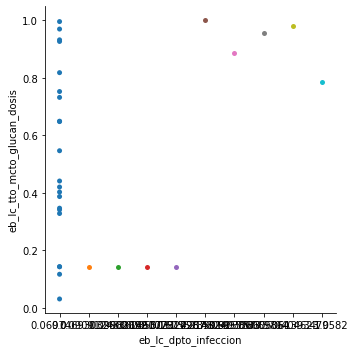

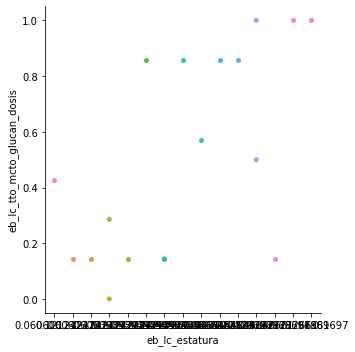

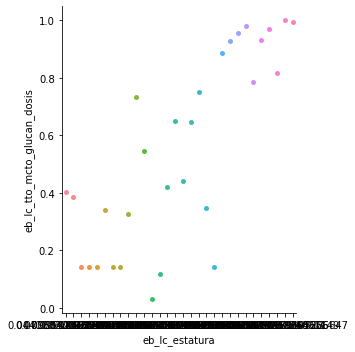

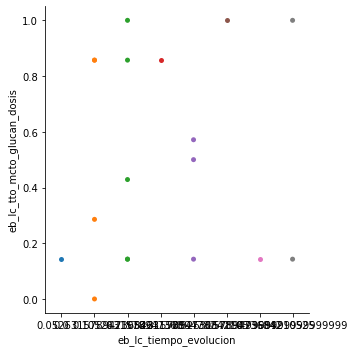

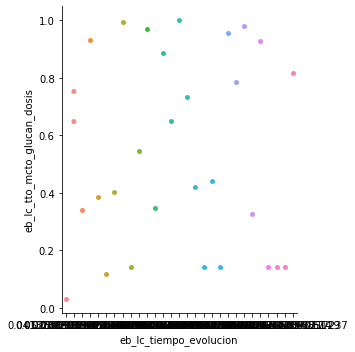

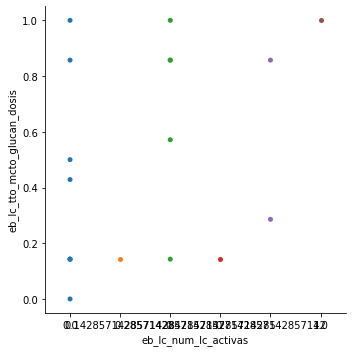

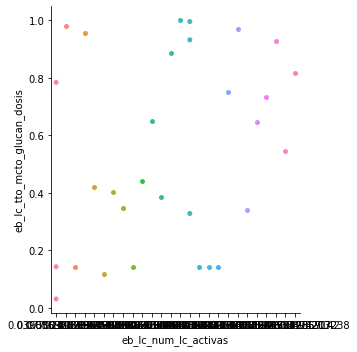

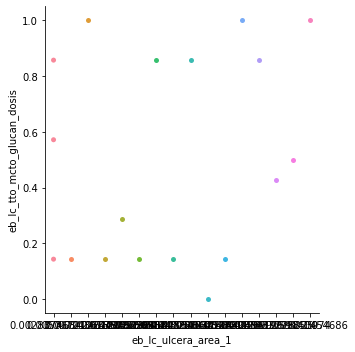

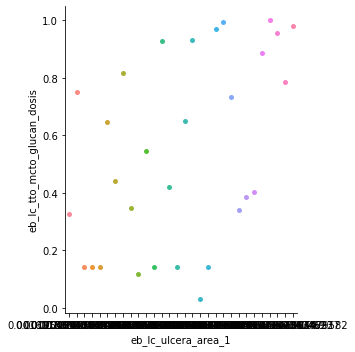

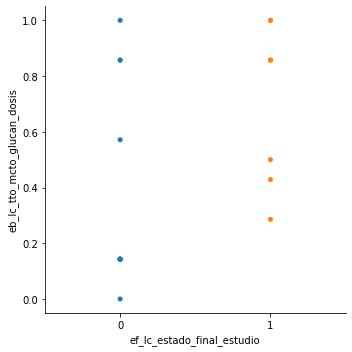

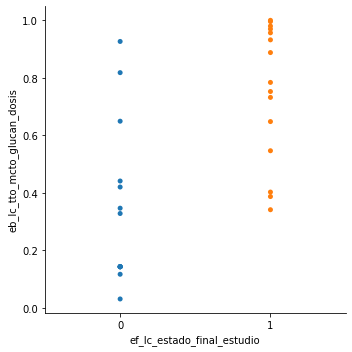

In [3]:
for col in original.columns:
    if col!="eb_lc_tto_mcto_glucan_dosis":
        sns.catplot(x=col, y="eb_lc_tto_mcto_glucan_dosis", jitter=False, data=original)
        sns.catplot(x=col, y="eb_lc_tto_mcto_glucan_dosis", jitter=False, data=fake)

In [4]:
fake.shape

(30, 10)

In [5]:
original.describe()

,eb_lc_sexo,eb_lc_etnia,edad,eb_lc_dpto_infeccion,eb_lc_estatura,eb_lc_tiempo_evolucion,eb_lc_num_lc_activas,eb_lc_ulcera_area_1,eb_lc_tto_mcto_glucan_dosis,ef_lc_estado_final_estudio
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.277778,0.388889,0.343434,0.194444,0.473064,0.277778,0.246032,0.121634,0.503968,0.388889
std,0.460889,0.471405,0.256709,0.388772,0.293824,0.309959,0.301280,0.257732,0.370322,0.501631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.143939,0.000000,0.250000,0.065789,0.000000,0.006136,0.142857,0.000000
50%,0.000000,0.000000,0.303030,0.000000,0.439394,0.105263,0.214286,0.022930,0.464286,0.000000
75%,0.750000,1.000000,0.507576,0.000000,0.712121,0.315789,0.285714,0.062153,0.857143,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
fake.describe()

,eb_lc_sexo,eb_lc_etnia,edad,eb_lc_dpto_infeccion,eb_lc_estatura,eb_lc_tiempo_evolucion,eb_lc_num_lc_activas,eb_lc_ulcera_area_1,eb_lc_tto_mcto_glucan_dosis,ef_lc_estado_final_estudio
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.200000,0.272178,0.305797,0.111507,0.480287,0.271115,0.266345,0.124455,0.541629,0.500000
std,0.406838,0.327293,0.199142,0.260649,0.294878,0.220222,0.203044,0.234963,0.332741,0.508548
min,0.000000,0.000000,0.032965,0.000000,0.044079,0.041325,0.000000,0.001612,0.030689,0.000000
25%,0.000000,0.000000,0.184497,0.000000,0.193678,0.097690,0.119961,0.010854,0.189137,0.000000
50%,0.000000,0.175897,0.267663,0.000000,0.456065,0.171194,0.231088,0.029675,0.493682,0.500000
75%,0.000000,0.392588,0.341240,0.085621,0.707822,0.422085,0.355099,0.085371,0.870373,1.000000
max,1.000000,1.000000,0.849973,1.000000,0.989970,0.787661,0.787661,0.860506,1.000000,1.000000


In [7]:
fake["ef_lc_estado_final_estudio"].value_counts()

1    15
0    15
Name: ef_lc_estado_final_estudio, dtype: int64

In [8]:
y_train = fake["ef_lc_estado_final_estudio"]
X_train = fake.drop('ef_lc_estado_final_estudio', 1)

y_test = original["ef_lc_estado_final_estudio"]
X_test = original.drop('ef_lc_estado_final_estudio', 1)

In [9]:
# Librerías para los modelos de Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Librerías para la evaluación de los modelos de Machine Learning
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib

In [10]:
metricas = list()
def build_model(model, X_train, y_train, X_test, y_test):
    clf = model
    clf.fit(X_train, y_train)
    joblib.dump(model, "/home/juan/Documents/nueva_data_tesis/all/augmentations/saved_models/"+ type(model).__name__+'.pkl')
    clf_pred = clf.predict(X_test)
    
    # Evaluación
    tmp = list()
    precision = precision_score(y_test,clf_pred)
    recall = recall_score(y_test,clf_pred)
    fscore = f1_score(y_test,clf_pred)

    tmp.append(str(type(model).__name__))
    tmp.append(precision)
    tmp.append(recall)
    tmp.append(fscore)
    metricas.append(tmp)
    print("Precision: ",precision)
    print("Recall:    ",recall)
    print("F1score:   ",fscore)
    
    return clf_pred,clf

### Clasificador por Regresión Logística

In [11]:
log_reg = LogisticRegression(C = 5, fit_intercept = True, max_iter = 50, penalty = 'l1',
                             solver = 'liblinear', tol = 0.001)
log_reg_pred , model = build_model(log_reg, X_train, y_train, X_test, y_test)


importance = model.coef_.tolist()[0]

names = [
    "gender","ethnicity", "age", "infection department", "height", "evolution time",
    "Number of Active Injuries", "ulcer area 1", "glucantime dosage"
]
data = list()
for i in range(len(importance)):
    tmp = list()
    tmp.append(names[i])
    tmp.append(importance[i])
    data.append(tmp)
msv_lg = pd.DataFrame(data, columns = ["Variable","Coefficient"])
msv_lg.to_excel("msv/logistic.xlsx", index = False)

Precision:  0.7777777777777778
Recall:     1.0
F1score:    0.8750000000000001


### Clasificador K-vecinos más cercanos (k=5)

In [12]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 2, weights = 'distance')
knn_pred = build_model(knn, X_train, y_train, X_test, y_test)[0]

Precision:  0.8571428571428571
Recall:     0.8571428571428571
F1score:    0.8571428571428571


### Clasificador Random Forest

In [13]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 31, max_features = 'sqrt', 
                            max_leaf_nodes = 11, min_samples_leaf = 3, 
                            min_samples_split = 6)
rf_pred , model = build_model(rf, X_train, y_train, X_test, y_test)

importance = model.feature_importances_.tolist()

names = [
    "gender","ethnicity", "age", "infection department", "height", "evolution time",
    "Number of Active Injuries", "ulcer area 1", "glucantime dosage"
]
data = list()
for i in range(len(importance)):
    tmp = list()
    tmp.append(names[i])
    tmp.append(importance[i])
    data.append(tmp)
msv_lg = pd.DataFrame(data, columns = ["Variable","Coefficient"])
msv_lg.to_excel("msv/rf.xlsx", index = False)

Precision:  0.75
Recall:     0.8571428571428571
F1score:    0.7999999999999999


### SVM

In [14]:
svm = SVC(C = 10, gamma = 0.001, kernel = 'linear')
svm_pred = build_model(svm, X_train, y_train, X_test, y_test)[0]

Precision:  0.875
Recall:     1.0
F1score:    0.9333333333333333


### MLP

In [15]:
mlp = MLPClassifier(activation = 'tanh', alpha = 0.0001, 
                     hidden_layer_sizes = (9, 9, 9), 
                     learning_rate = 'constant', solver = 'adam',max_iter = 500)
mlp_pred = build_model(mlp, X_train, y_train, X_test, y_test)[0]

Precision:  0.875
Recall:     1.0
F1score:    0.9333333333333333


/home/juan/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
result_table = pd.DataFrame(columns = ['Modelo', 'Precision','Recall','F1Score'])
for i in range(len(metricas)):
    result_table = result_table.append({'Modelo':metricas[i][0],
                                        'Precision':metricas[i][1], 
                                        'Recall':metricas[i][2], 
                                        'F1Score':metricas[i][3]}, ignore_index = True)
result_table.to_excel("results/smote.xlsx", index = False)